In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EXPLORATORY DATA ANALYSIS

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from imblearn.metrics import geometric_mean_score

import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [2]:

data = pd.read_csv('/kaggle/input/thanjavur-dataset-new/updated_dataset .csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311262 entries, 0 to 311261
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          311262 non-null  int64  
 1   MO            311262 non-null  int64  
 2   DY            311262 non-null  int64  
 3   T2M           311262 non-null  float64
 4   T2MDEW        311262 non-null  float64
 5   T2M_MAX       311262 non-null  float64
 6   T2M_MIN       311262 non-null  float64
 7   RH2M          311262 non-null  float64
 8   PRECTOTCORR   311262 non-null  float64
 9   PS            311262 non-null  float64
 10  WS10M         311262 non-null  float64
 11  Station_no    311262 non-null  int64  
 12  RainToday     311262 non-null  int64  
 13  RainTomorrow  311262 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 33.2 MB


# BASIC INFORMATION LIKE SUMMARY OF DATASET, SUMMARY STATISTICS, MISSING VALUES IN EACH COLUMN

In [23]:
data.info()  # Summary of dataset (columns, data types, missing values)
data.describe()  # Summary statistics (mean, min, max, std, etc.)
data.isnull().sum()  # Count missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311262 entries, 0 to 311261
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          311262 non-null  int64  
 1   MO            311262 non-null  int64  
 2   DY            311262 non-null  int64  
 3   T2M           311262 non-null  float64
 4   T2MDEW        311262 non-null  float64
 5   T2M_MAX       311262 non-null  float64
 6   T2M_MIN       311262 non-null  float64
 7   RH2M          311262 non-null  float64
 8   PRECTOTCORR   311262 non-null  float64
 9   PS            311262 non-null  float64
 10  WS10M         311262 non-null  float64
 11  Station_no    311262 non-null  int64  
 12  RainToday     311262 non-null  int64  
 13  RainTomorrow  311262 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 33.2 MB


YEAR            0
MO              0
DY              0
T2M             0
T2MDEW          0
T2M_MAX         0
T2M_MIN         0
RH2M            0
PRECTOTCORR     0
PS              0
WS10M           0
Station_no      0
RainToday       0
RainTomorrow    0
dtype: int64

# HISTOGRAM OF EACH FEATURE

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


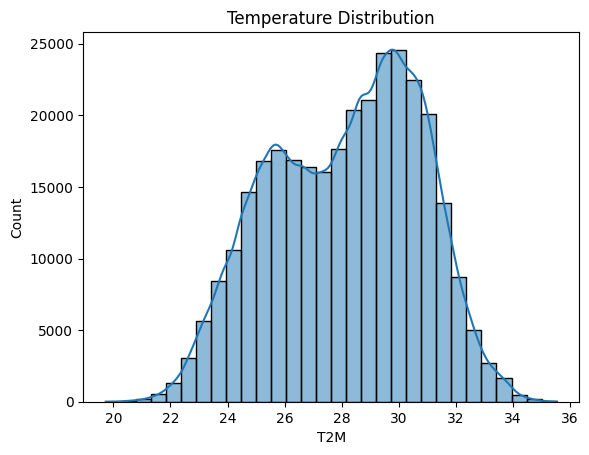

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


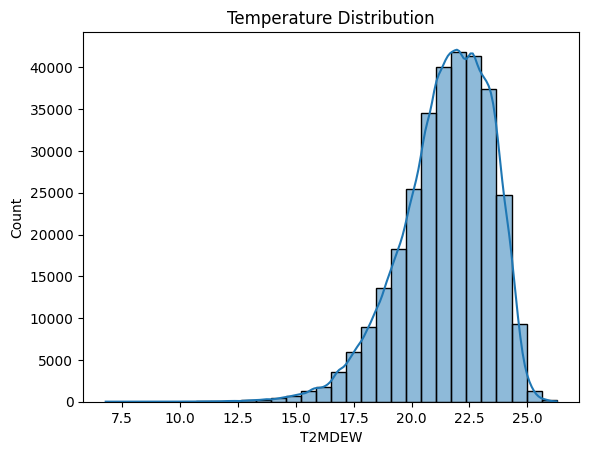

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of a feature
sns.histplot(data['T2M'], bins=30, kde=True)  
plt.title("Temperature Distribution")
plt.show()
# Histogram of a feature
sns.histplot(data['T2MDEW'], bins=30, kde=True)  
plt.title("Temperature Distribution")
plt.show()



In [4]:
print("Columns in dataset:", data.columns.tolist())


Columns in dataset: ['YEAR', 'MO', 'DY', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'Station_no', 'RainToday', 'RainTomorrow']


In [5]:
data['RainTomorrow'] = data['RainTomorrow'].astype(str)  # Convert to categorical

# Now re-run the selection
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()

# Now you can safely remove it
categorical_columns.remove('RainTomorrow')

print("✅ Numeric Columns:", numeric_columns)
print("✅ Categorical Columns:", categorical_columns)


✅ Numeric Columns: ['YEAR', 'MO', 'DY', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'Station_no', 'RainToday']
✅ Categorical Columns: []


In [6]:
# Data Defining for Visualization and Processing
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns.remove('RainTomorrow')
numeric_columns,categorical_columns

(['YEAR',
  'MO',
  'DY',
  'T2M',
  'T2MDEW',
  'T2M_MAX',
  'T2M_MIN',
  'RH2M',
  'PRECTOTCORR',
  'PS',
  'WS10M',
  'Station_no',
  'RainToday'],
 [])

In [7]:
data.head()

,YEAR,MO,DY,T2M,T2MDEW,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M,Station_no,RainToday,RainTomorrow
0,1982,1,1,23.62,20.83,26.85,21.36,84.88,0.05,101.04,4.98,10,0,0
1,1982,1,2,23.39,20.58,26.80,21.23,84.81,0.08,101.01,4.66,10,0,0
2,1982,1,3,23.04,20.25,26.98,20.07,85.00,0.06,100.98,4.42,10,0,0
3,1982,1,4,22.33,19.36,26.40,19.59,84.12,0.00,101.00,3.97,10,0,0
4,1982,1,5,22.75,19.26,26.61,20.26,81.31,0.03,101.05,4.50,10,0,0


In [8]:
# Select features and target
X = data.drop(['RainTomorrow'], axis=1)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Display missing values, numerical features, and categorical features separately
missing_values = X.isnull().sum()

# Print the results
print("Missing Values:\n", missing_values[missing_values > 0])  # Display missing values only for columns with missing data
print("\nNumerical Features:\n", numerical_features)
print("\nCategorical Features:\n", categorical_features)

Missing Values:
 Series([], dtype: int64)

Numerical Features:
 Index(['YEAR', 'MO', 'DY', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'Station_no', 'RainToday'],
      dtype='object')

Categorical Features:
 Index([], dtype='object')


# MISSING VALUE HEATMAP

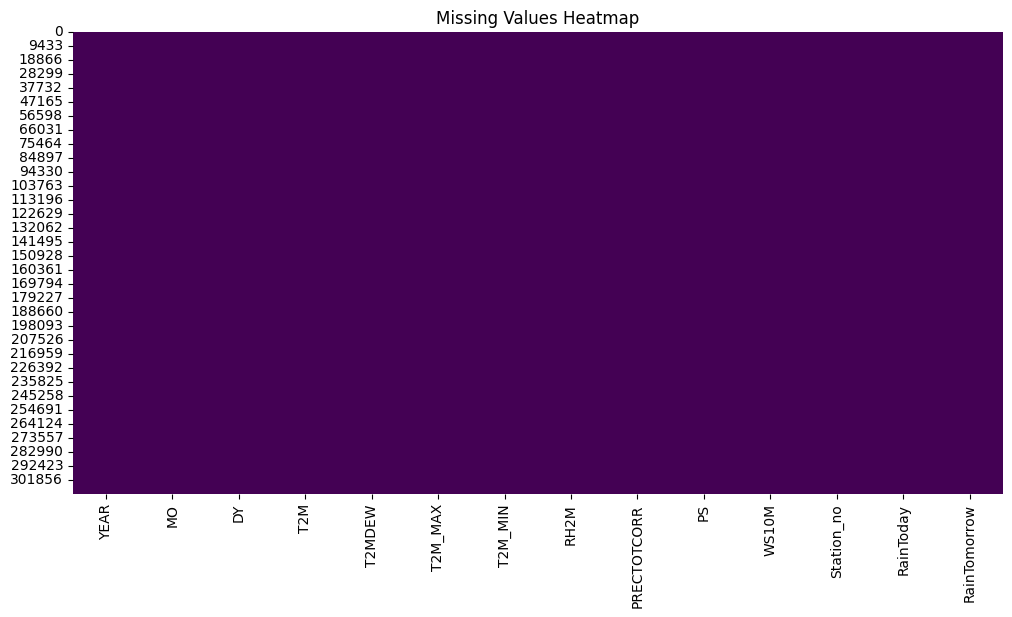

In [9]:
# Visualize missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [11]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    plt.figure(figsize=(12, 6), dpi=150)
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for clarity
    plt.ylabel("Missing Values Count", fontsize=12)
    plt.title("📊 Missing Values Per Feature", fontsize=14, fontweight='bold')
    plt.show()


✅ No missing values found in the dataset.


# CORRELEATION OF THANJAVUR DATASET

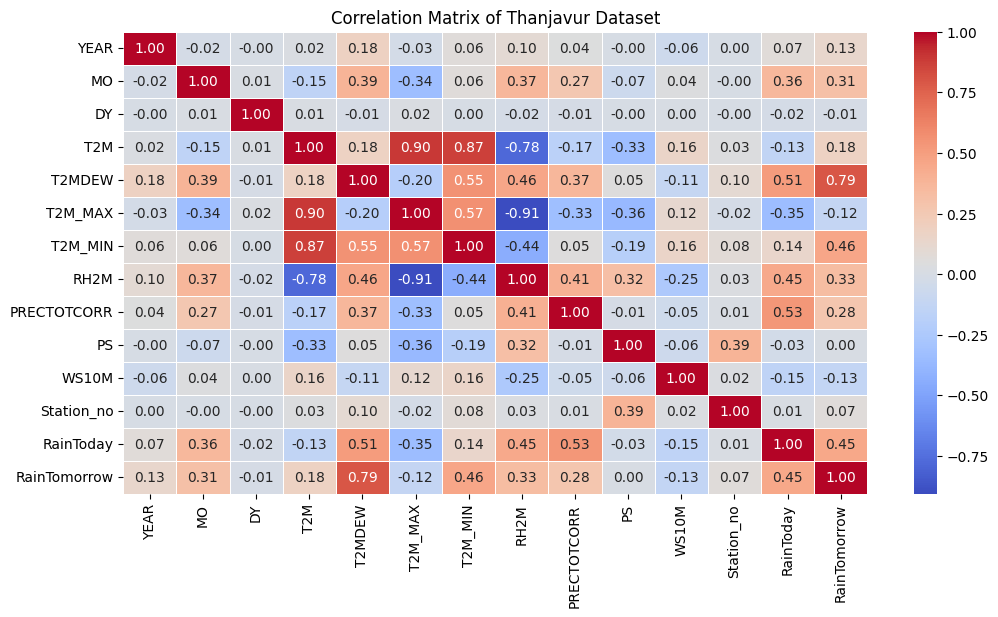

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/thanjavur-dataset-new/updated_dataset .csv')

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Thanjavur Dataset")
plt.show()


# PIE CHART OF RAINTOMORROW PREDICTION

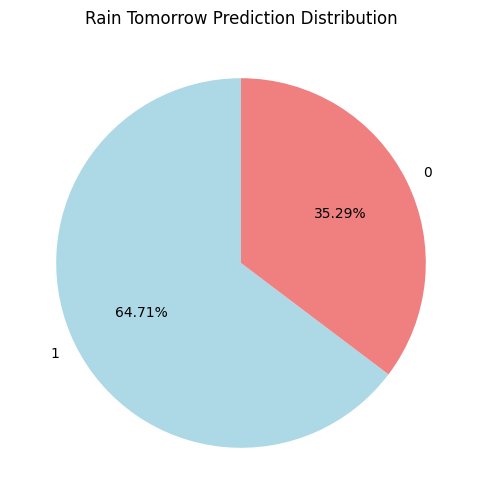

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'weatherAUS.csv' with your file path)
df = pd.read_csv('/kaggle/input/thanjavur-dataset-new/updated_dataset .csv')

# Count the values for "Yes" and "No"
rain_counts = df['RainTomorrow'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Rain Tomorrow Prediction Distribution')
plt.show()


# PIECHART OF RAINTODAY PREDICTION

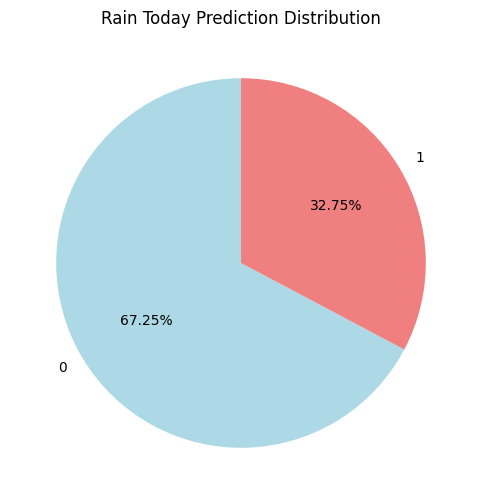

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'weatherAUS.csv' with your file path)
df = pd.read_csv('/kaggle/input/thanjavur-dataset-new/updated_dataset .csv')

# Count the values for "Yes" and "No"
rain_counts = df['RainToday'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Rain Today Prediction Distribution')
plt.show()


# EXPLORING NUMERICAL VARIABLES

In [20]:
# Exploring Numerical Variables

df_num = df.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns


Index(['T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'PS',
       'WS10M'],
      dtype='object')

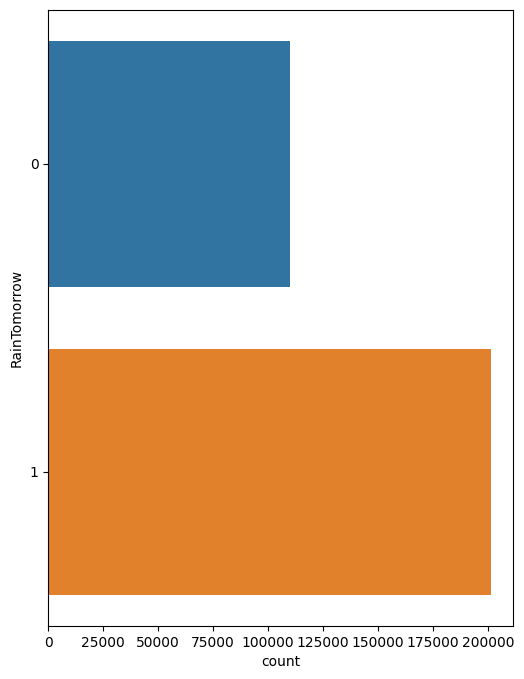

(311262, 0)

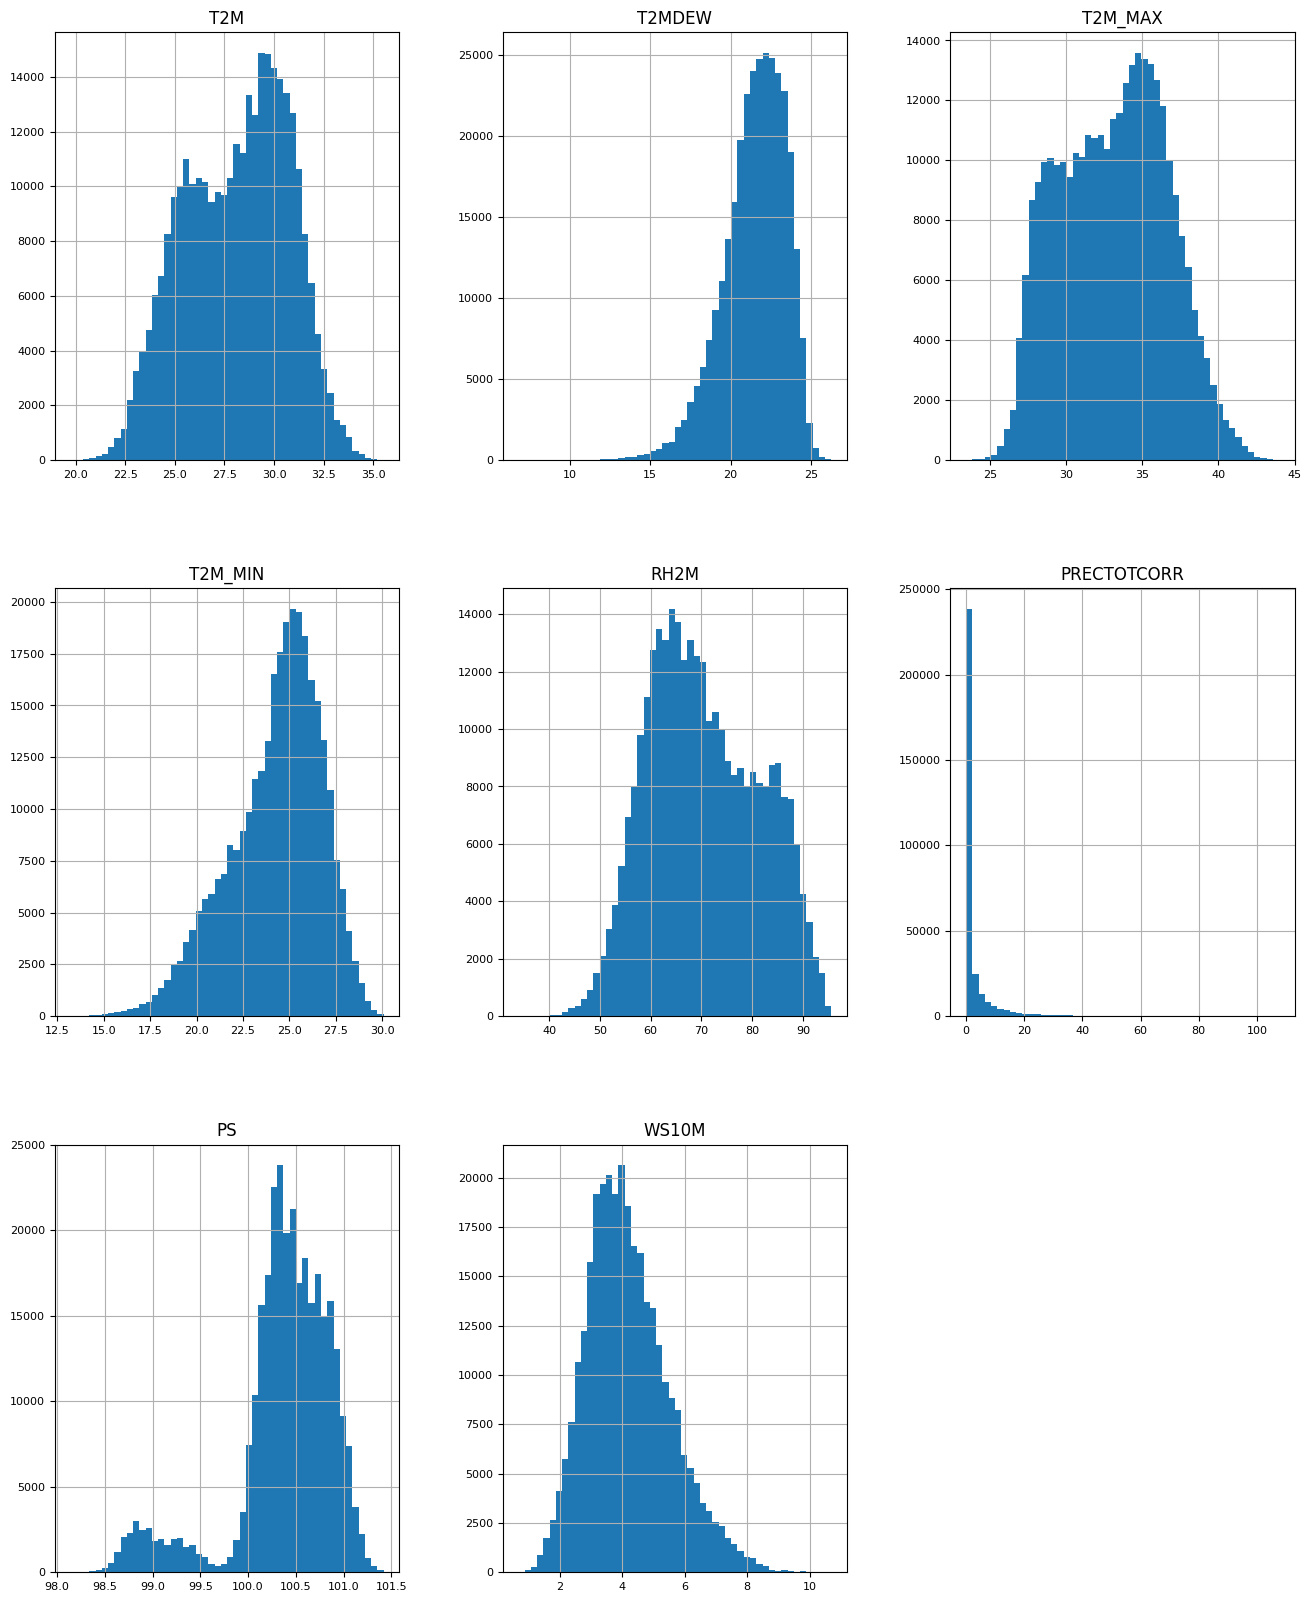

In [21]:
df_num.shape

df['RainTomorrow'].unique()

#View the Frequency Distribution
df['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=df)
plt.show()

# Histogram for Numerical Variables

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Exploring Categorical Variables

df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

# EXPLORING TARGET VARIABLES

<Axes: xlabel='RainTomorrow', ylabel='count'>

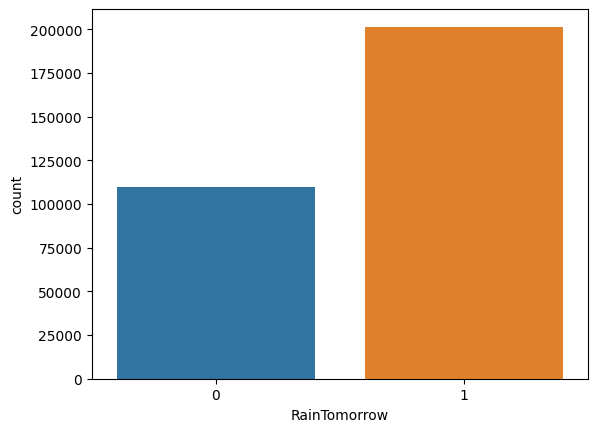

In [22]:
# Exploring Targeted Variable 

sns.countplot(x="RainTomorrow", data=df)


# we can see there is more numbers of "no" values and it is imbalanced data 
# Although we can balance it but there is no need because it is actuall demographics 